<div style="background-color: #d9ffd4; padding: 20px; border-radius: 10px;">
    <h1 style="color: #2F4F4F; font-family: Calibri, sans-serif; text-align: center;">Clase 5</h1>
    <p style="color: #2F4F4F; font-family: Calibri, Courier, monospace; text-align: center; font-size: 24px;">
        Derivada Numérica: Central Difference y Error de derivación
    </p>
</div>

### **Derivada Numérica**

La derivada numérica es un método para aproximar la derivada de una función a partir de valores discretos. Es particularmente útil cuando no se dispone de una expresión analítica de la función, y solo se conocen sus valores en puntos específicos del dominio.


**Derivada Analítica:**

Formalmente, la derivada de una función $f(x)$ se define como:

$$
f'(x) = \frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
$$

Esta expresión representa el límite del cociente de diferencias a medida que $h$ tiende a cero.

Geométricamente, la derivada en un punto $x$ corresponde a la pendiente de la recta tangente a la curva de la función en dicho punto.


**Derivada Numérica:**

En la práctica computacional, no es posible hacer que $h$ tienda a cero debido a las limitaciones del cálculo numérico, como el redondeo y la precisión finita de las representaciones en punto flotante. Por ello, se utiliza un valor pequeño pero finito de $h$, que llamaremos $\color{blue}{\text{tamaño de paso}}$, para aproximar la derivada mediante fórmulas de diferencias finitas.

Algunas de las aproximaciones más comunes son las siguientes:


<div style="text-align:center;">
    <img src="derivadas.png" alt="forward_diff" style="width:80%;">
</div>

A continuación se presenta la derivada de la función $f(x) = x^3 + 3x + 2$:

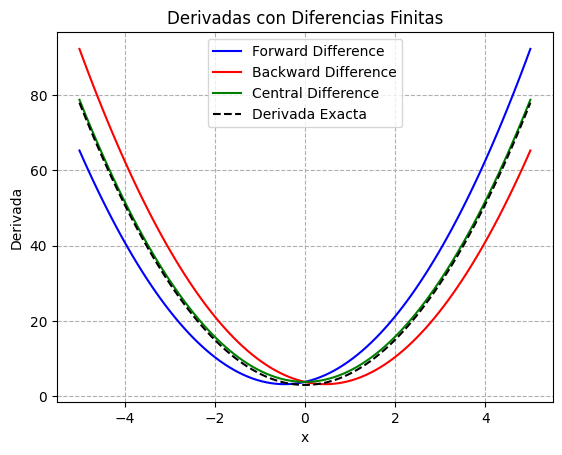

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función y su derivada exacta
def f(x):
    return x**3 + 3*x + 2  # Ejemplo de función

def df_exacta(x):
    return 3*x**2 + 3  # Derivada exacta de f(x)

# Definir los métodos de diferencia
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

# Crear el vector de puntos para la gráfica
x_values = np.linspace(-5, 5, 100)  # Rango de valores de x
h = 0.9  # Paso para las diferencias finitas

# Calcular las derivadas usando los tres métodos
df_forward = [forward_difference(f, x, h) for x in x_values]
df_backward = [backward_difference(f, x, h) for x in x_values]
df_central = [central_difference(f, x, h) for x in x_values]
df_exact = df_exacta(x_values)

# Graficar los resultados
plt.figure()
plt.plot(x_values, df_forward, label="Forward Difference", color="blue", linestyle="-")
plt.plot(x_values, df_backward, label="Backward Difference", color="red", linestyle="-")
plt.plot(x_values, df_central, label="Central Difference", color="green", linestyle="-")
plt.plot(x_values, df_exact, label="Derivada Exacta", color="black", linestyle="--")

# Personalizar la gráfica
plt.title("Derivadas con Diferencias Finitas")
plt.xlabel("x")
plt.ylabel("Derivada")
plt.legend()
plt.grid(ls="--")
plt.show()


**¿Qué método tiene mayor precisión?** Al ojo, el método central difference tiene mayor precisión. Sin embargo, podemos estudiar formalmente la precisión de estos métodos utilizando la Expansión en Serie de Taylor.

Recuerde que,

$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} \left( x-x_0 \right)^n = f(x_0) + f'(x_0) \left( x-x_0 \right) + \frac{f''(x_0)}{2!} \left( x-x_0 \right)^2 + + \frac{f'''(x_0)}{3!} \left( x-x_0 \right)^3 + ...$$

Esta expansión nos da una aproximación de la función $f(x)$, como una suma de potencias centrada en $x_0$, es decir, la función aproximada tiene mayor precisión cuando $x$ está cercano a $x_0$.

**¿Y qué tiene que ver esto con la precisión de una derivada numérica?** 😱🙃

Cuando estudiamos derivadas, estamos estudiando el cambio de una función $f$ en un punto $x$, respecto de un punto muy cercano $x + h$. En consecuencia, nos interesa estudiar el comportamiento de $f(x+h)$ en torno a $x_0=x$.

Sustituyendo $x_0=x$ y $x=x+h$ en la fórmula de Taylor, nos queda:

$$ f(x+h) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x)}{n!} \left( x+h-x \right)^n = \sum_{n=0}^{\infty} \frac{f^{(n)}(x)}{n!} h^n = f(x) + f'(x) h + \frac{f''(x)}{2!} h^2 + + \frac{f'''(x)}{3!} h^3 + ...$$

En resumen:

$$\boxed{\color{blue}{
f(x+h) = f(x) + hf'(x) + h^2 \frac{ f''(x)}{2!} + ... 
}}
$$

Pasamos $f(x)$ al lado izquierdo de la igualdad:

$$ f(x+h) - f(x) =  hf'(x) + h^2 \frac{ f''(x)}{2!} + ...   $$

Dividimos por $h$:

$$ \frac{f(x+h) - f(x)}{h} =  \frac{hf'(x)}{h} + \frac{h^2}{h} \frac{ f''(x)}{2!} + ... =  f'(x) + h \frac{ f''(x)}{2!} + ... $$

Por lo que finalmente:

$$ f'_{fd}(x) = f'(x) + h \frac{ f''(x)}{2!} + ... = f'(x) + \epsilon(h) $$

Es decir, la derivada forward difference es igual a la derivada analítica (derivada exacta) más un error de aproximación $\epsilon(h)$ de orden $h$ 🤯🧐

Siguiendo el mismo procedimiento para backward difference se llega a:

$$ f'_{bd}(x) = f'(x) - h \frac{ f''(x)}{2!} + ... = f'(x) - \epsilon(h) $$

Ambos métodos tienen un error de aproximación de orden $h$, por lo que presentan la misma precisión.

**¿De qué orden es el error de aproximación del método central difference?**

Para ello es necesario calcular $f(x+h)$ y $f(x-h)$ mediante la serie de taylor.

Este calculo da como resultado:

$$ f'_{cd}(x) = \frac{f(x+h) - f(x-h)}{2h} = f'(x) + \epsilon(h^2) $$

Este método presenta un error de aproximación de orden $h^2$. Dado que en general $h$ es menor que 1, $\epsilon(h^2) < \epsilon(h)$

Ejemplo: sea $h=0.1=\frac{1}{10}$, entonces $h^2 = 0.01 = \frac{1}{100}$.

Por lo tanto, el método central difference es más preciso que forward y backward difference.

**Resumen**:

$$ f_{fd}'(x) = f'(x) + \epsilon(h)$$
$$ f_{bd}'(x) = f'(x) - \epsilon(h)$$
$$ f_{cd}'(x) = f'(x) + \epsilon(h^2)$$

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 1**: Calcule la derivada de la función $f(x)=\sqrt{x+\ln(x)}$ en $x=1$, es decir, $f'(1)$. Utilice **forward difference** y **central difference**. Compare su resultado con la derivada exacta (derivada analítica). Realice este cálculo para $h=10^{-16}, 10^{-15}, 10^{-14}, 10^{-13}, ...,10^{-2}, 10^{-1}$. Grafique el error relativo porcentual $\epsilon_\%$ vs $h$, definido como:

$$ \epsilon_\% = \left | \frac{f'_\text{exacta}(1) - f'_\text{num}(1)}{f'_\text{exacta}(1)}  \right| \cdot 100 $$

¿Para qué valor de $h$ el error es mínimo?

</div>

Solución del problema paso a paso:

1. ¿Cuál es la derivada analítica de $f(x)$? Derive a la antigua (a mano) la función $f(x)$. Una vez obtenida la expresión de la derivada, defina tanto la función original como su derivada en Python como funciones independientes.

In [29]:
# Derivada analítica de la función

def f(x):
    return np.sqrt(x + np.log(x))

def f_prime(x):
    return ( 1 + 1/x ) / (2*np.sqrt(x + np.log(x)))

2. Calcule la derivada $f'(1)$, es decir, evalúe la derivada en $x=1$. Hágalo para `forward_difference`, `central_difference` y para la derivada analítica. Utilice en primera instancia $h=0.1$. Finalmente, calcule los errores relativos porcentuales:

$$ \epsilon_{\textup{fd}} = \left | \frac{f'_{\textup{exacta}}(1) - f'_{\textup{fd}}(1)}{f'_{\textup{exacta}}(1)}  \right| \cdot 100 ~~\textup{y}~~ \epsilon_{\textup{cd}} = \left | \frac{f'_{\textup{exacta}}(1) - f'_{\textup{cd}}(1)}{f'_{\textup{exacta}}(1)}  \right| \cdot 100$$


In [30]:
# Código acá
h = 0.1
x = 1

df_forward = forward_difference(f, x, h)
df_central = central_difference(f, x, h)
df_exact = f_prime(x)

error_forward = np.abs( (df_exact - df_forward) / df_exact ) * 100
error_central = np.abs( (df_exact - df_central) / df_exact ) * 100

print(f"El error numérico de forward difference es: {error_forward:.2f} %")
print(f"El error numérico de central difference es: {error_central:.2f} %")

El error numérico de forward difference es: 6.70 %
El error numérico de central difference es: 0.94 %


3. Automatice el paso 2 para los diferentes valores de $h$. Al final de este paso, debería tener una tabla de datos de la siguiente forma:

<center>

| $h$          | $f'_{\textup{exacta}}(1)$ | $f'_{\textup{fd}}(1)$ | $f'_{cd}(1)$ | $\epsilon_{\textup{fd}}$| $\epsilon_{\textup{cd}}$ |
|:-------------:|:----------:|:----------:|:--:|:--:|:--:|
| $10^{-16}$   |    |  | | ||
| $10^{-15}$   |    |  | | ||
| $10^{-14}$   |    |  | | ||
| $10^{-13}$   |    |  | | ||
| $10^{-12}$   |    |  | | ||
| ...          | ...| ...|...|...|...|
| $10^{-1}$    |    |  ||||

</center>

*Sugerencia: Utilice `np.logspace(start=-16, stop=-1 num=16, base=10)` para definir $h$.*

In [31]:
np.logspace(start=-16, stop=-1, num=16, base=10)

array([1.e-16, 1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09,
       1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01])

In [32]:
# codigo acá
H = np.logspace(start=-16, stop=-1, num=16, base=10)
x = 1

#Error_central = []
Error_central = np.zeros_like(H)
Error_forward = np.zeros_like(H)

for i, h in enumerate(H):
    df_forward = forward_difference(f, x, h)
    df_central = central_difference(f, x, h)

    error_forward = np.abs( (df_exact - df_forward) / df_exact ) * 100
    error_central = np.abs( (df_exact - df_central) / df_exact ) * 100

    #Error_central.append(error_central)
    Error_central[i] = error_central
    Error_forward[i] = error_forward


Error_central

array([4.44888488e+01, 5.47118734e+00, 7.99277837e-02, 2.44166325e-02,
       3.33894311e-03, 8.27403710e-06, 8.27403710e-06, 2.72292198e-06,
       5.26355848e-08, 2.87556645e-09, 2.67554867e-09, 8.98179309e-09,
       9.16700138e-07, 9.16668742e-05, 9.16877773e-03, 9.38442125e-01])

In [33]:
# Uso de enumerate
H = np.logspace(start=-16, stop=-1, num=16, base=10)

for i, h in enumerate(H):
    print(i, h)

0 1e-16
1 1e-15
2 1e-14
3 1e-13
4 1e-12
5 1e-11
6 1e-10
7 1e-09
8 1e-08
9 1e-07
10 1e-06
11 1e-05
12 0.0001
13 0.001
14 0.01
15 0.1


4. Grafique en una misma figura, las curvas $\epsilon_{\textup{fd}}$ vs $h$ y $\epsilon_{\textup{cd}}$ vs $h$. Utilice gráfico log-log.

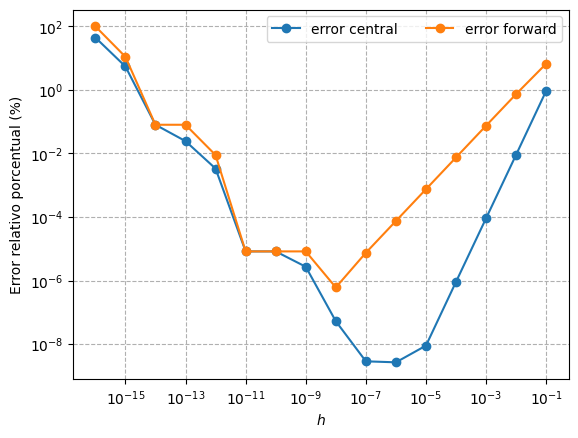

In [34]:
# Código acá

plt.loglog(H, Error_central, marker="o", label="error central")
plt.loglog(H, Error_forward, marker="o", label="error forward")
plt.grid(ls="--")
plt.ylabel("Error relativo porcentual (%)")
plt.xlabel(r"$h$")
plt.legend(ncol=2)

Mirando el gráfico responda: ¿Cuál es el valor de $h$ que minimiza el error?

In [35]:
print(f"El error mínimo de central difference es {np.min(Error_central):.2e}, y se obtiene con un valor de h igual a {H[np.argmin(Error_central)]}")
print(f"El error mínimo de central difference es {np.min(Error_forward):.2e}, y se obtiene con un valor de h igual a {H[np.argmin(Error_forward)]}")

El error mínimo de central difference es 2.68e-09, y se obtiene con un valor de h igual a 1e-06
El error mínimo de central difference es 6.08e-07, y se obtiene con un valor de h igual a 1e-08


Para entender el comportamiento del error relativo en función de $h$, cuando $h$ es muy cercano a cero, es necesario comprender qué es el error de la máquina $\epsilon_m$ y el valor `eps`.

### **Error de la Máquina y valor eps**

Como estudiamos en clases anteriores, en la computación científica existe una **discrepancia** entre el valor real de un número y su representación en una computadora. Este error se debe a que los números en una computadora se almacenan utilizando una **cantidad finita de bits**, lo que puede resultar en **redondeos** que afectan la **precisión** de los cálculos.

En el ámbito de la representación de números de punto flotante, existe un valor llamado "epsilon" (`eps`), que representa el menor número positivo que, al sumarlo a 1, da un resultado diferente de 1 en el sistema de coma flotante:

$$ 1 + \text{eps} \neq 1$$

Por otro lado, el error de máquina $\epsilon_m$ es en general la mitad de `eps`. Es el mayor número positivo tal que $1 + \epsilon_m$ todavía se considera igual a 1 en la computadora:

$$ 1 + \epsilon_m = 1 $$

<!-- Este valor epsilon es fundamental para comprender la precisión de los cálculos numéricos, ya que define la resolución mínima que puede alcanzar un número en el sistema de punto flotante, y afecta directamente la precisión de las operaciones aritméticas y la estabilidad de los algoritmos numéricos. -->

En la siguiente rutina, se determina el valor eps y el error de la máquina:

In [36]:
import numpy as np
import sys

def machine_epsilon_float32():
    epsilon = np.float32(1)
    
    while (np.float32(1) + epsilon) != np.float32(1):
        epsilon /= np.float32(2)
    return epsilon

def machine_epsilon_float64():
    epsilon = np.float64(1)
    
    while (np.float64(1) + epsilon) != np.float64(1):
        epsilon /= np.float64(2)
    return epsilon

epsilon_float32 = machine_epsilon_float32()
epsilon_float64 = machine_epsilon_float64()

print("Error de la máquina para 32 bits (float32):", epsilon_float32)
print("Error de la máquina para 64 bits (float64):", epsilon_float64)
print("Valor numérico mínimo de 64 bits, que permite que 1 + eps != 1 :", sys.float_info.epsilon)

Error de la máquina para 32 bits (float32): 5.9604645e-08
Error de la máquina para 64 bits (float64): 1.1102230246251565e-16
Valor numérico mínimo de 64 bits, que permite que 1 + eps != 1 : 2.220446049250313e-16


In [37]:
sys.float_info.epsilon + 1 == 1

False

In [38]:
eps = sys.float_info.epsilon

print(f"el valor eps={eps}, es el valor mínimo que permite distuinguir 1+eps == 1: ", 1 + eps == 1)
print(f"el error de la máquina (e_m)={epsilon_float64}, es un valor que ya no permite distuinguir 1+e_m == 1: ", 1 + epsilon_float64 == 1)

el valor eps=2.220446049250313e-16, es el valor mínimo que permite distuinguir 1+eps == 1:  False
el error de la máquina (e_m)=1.1102230246251565e-16, es un valor que ya no permite distuinguir 1+e_m == 1:  True


Como han podido notar, el error de las derivadas numéricas tiene dos tendencias:

1. Crece a medida que $h$ es más grande: error de aproximación $\varepsilon_\text{aprox}$
2. Crece a medida que $h$ es muy pequeño: error de redondeo $\varepsilon_\text{redondeo}$
3. Existe un $h$ óptimo que minimiza el error total $\varepsilon_\text{total} = \varepsilon_\text{aprox} + \varepsilon_\text{redondeo}$



**Fórmulas para los errores:**

$$  \epsilon_\text{aprox}^\text{fd} = \frac{h f''(x)}{2} ~~,~~\epsilon_\text{aprox}^\text{cd} = \frac{h^2 f'''(x)}{24} ~~,~~  \epsilon_\text{redondeo} = \frac{\epsilon_m}{h} $$

<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">

**Ejercicio 2:** Dada la función $f(x)=x^2+3x+2$, realiza lo siguiente:

1. Calcula la derivada numérica utilizando el método de Forward Difference en $x=1$ para $h=10^{-16}, 10^{-15}, 10^{-14}, 10^{-13}, ...,10^2, 10^1, 10^0$ y determina el error relativo entre la derivada exacta y la derivada numérica.

2. Calcula el error de aproximación y el error de redondeo con las fórmulas dadas en el markdown anterior.

3. Grafica el error relativo total, el error de aproximación y el error de redondeo en función de $h$ en escala log-log.

4. Identifica el valor de $h$ óptimo, donde el error total es mínimo.

</div>

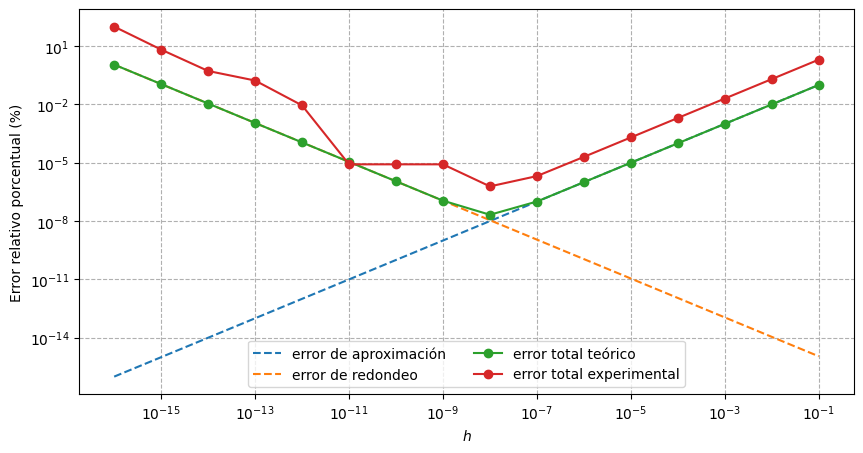

In [52]:
# Resultado Esperado

def f(x):
    return x**2 + 3*x + 2

def f_prime(x):
    return 2*x + 3

def f_double_prime(x):
    return 2

x = 1
df_exact = f_prime(x)
H = np.logspace(start=-16, stop=-1, num=16, base=10)
Error_central = np.zeros_like(H)
Error_aprox = np.zeros_like(H)

eps = sys.float_info.epsilon
e_m = eps/2
Error_redondeo = np.zeros_like(H)

for i, h in enumerate(H):
    df_forward = forward_difference(f, x, h)

    error_aprox = (h * f_double_prime(x)) / 2
    Error_aprox[i] = error_aprox

    error_redondeo = e_m/h
    Error_redondeo[i] = error_redondeo

    error_forward = np.abs( (df_exact - df_forward) / df_exact ) * 100
    Error_forward[i] = error_forward

# para graficar
plt.figure(figsize=(10, 5))
plt.loglog(H, Error_aprox, label="error de aproximación", ls="--")
plt.loglog(H, Error_redondeo, label="error de redondeo", ls="--")
plt.loglog(H, Error_aprox + Error_redondeo, marker="o", label="error total teórico")
plt.loglog(H, Error_forward, marker="o", label="error total experimental")

plt.legend(ncol=2)
plt.grid(ls="--")
plt.ylabel("Error relativo porcentual (%)")
plt.xlabel(r"$h$")

plt.show()

El $h_\text{opt}$ se obtiene cuando $\epsilon_\text{aprox} = \epsilon_\text{redondeo}$, determínelo de forma téorica (con las ecuaciones):

In [67]:
# calcúlelo e imprima el resultado

h_opt = np.sqrt(2 * e_m / f_double_prime(x))

print(f"El h óptimo teórico es {h_opt:.0e} y coincide con el h experimental.")

El h óptimo teórico es 1e-08 y coincide con el h experimental.


<div style="background-color: #FFF9AD; color: black; padding: 10px; border-radius: 5px;">


**Ejercicio propuesto:**

Calcule la primera derivada de $f(x) = \arctan(x)$ para $x=\sqrt{2}$ con pasos de tamaño $h=10^{-1}, 10^{-2}, 10^{-3}, ..., 10^{-20}$. Utilice diferencia central para aproximar las derivadas. Use números flotantes de precisión simple y doble (`np.float32` y `np.float64`). Determine el error relativo $$\varepsilon = \left| \frac{f'_{\textup{exacta}}(x) - f'_{\textup{num}}(x)}{f'_{\textup{exacta}}(x)} \right|$$

y haga gráficas $\varepsilon$ vs $h$ para flotantes con ambos tipos de precisión, en escala log-log.

</div>

In [68]:
# Su desarrollo acá

<div style="background-color: #d9ffd4; color: black; padding: 10px; border-radius: 5px;">

**Conclusión:** ¿Qué aprendimos?

En esta sesión:

1. Definimos la derivada central difference que permitn aproximar la derivada de una función en un punto utilizando diferencias finitas con mayor precisión que forward y backward difference.

2. Estudiamos cómo el tamaño del paso $h$ influye en la precisión de la derivada:

    - Cuando $h$ es demasiado grande, se incurre en un error de aproximación porque la fórmula de diferencia finita deja de ser una buena representación de la derivada.

    - Cuando $h$ es demasiado pequeño, se introduce un error de redondeo debido a las limitaciones de precisión numérica en los cálculos con punto flotante. Esto nos llevó a discutir el concepto de la precisión de la máquina ($\epsilon_m$) y su influencia en los errores numéricos al trabajar con valores pequeños de $h$.

3. Como resultado, no siempre un $h$ más pequeño mejora la precisión. Existe un valor óptimo de $h$ que minimiza el error total, y este valor puede variar según la función y el punto donde se evalúa la derivada.


**Próxima clase:** Segunda Derivada y derivada numérica sin función analítica
</div>

<div style="padding: 15px; border-top: 2px solid #2F4F4F; margin-top: 30px; background-color: var(--custom-bg-color); color: var(--custom-text-color);">
    <p style="font-family: Calibri, sans-serif; text-align: left; font-size: 16px;">
        Omar Fernández <br>
        Profesor de Física Computacional III para Astrofísica <br>
        Ingeniero Físico <br>
        <a href="mailto:omar.fernandez.o@usach.cl" class="email-link">omar.fernandez.o@usach.cl</a> <br>
    </p>
</div>

<style>
:root {
    --custom-bg-color: #F8F8F8;
    --custom-text-color: #2F4F4F;
    --custom-link-color: blue;
}

@media (prefers-color-scheme: dark) {
    :root {
        --custom-bg-color: #444444;
        --custom-text-color: #F8F8F8;
        --custom-link-color: magenta;
    }
}

.email-link {
    color: var(--custom-link-color);
}
</style>